## Exploring Walmart Sales Data

#### Step -1 : Importing the Required Libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
data = pd.read_csv('Walmart_Sales.csv')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


#### Step - 2 : Identifying the type of columns

##### Continuous : Weekly_Sales, Temperature, Fuel_Price, CPI, Unemployment
##### Discrete : Store, Holiday_Flag


#### Step - 3 : Finding any missing values in the dataset

In [8]:
data.isnull().sum() #m as there are no missing values we proceed to next step

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

#### Step - 4 : Finding Outliers using z-score

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

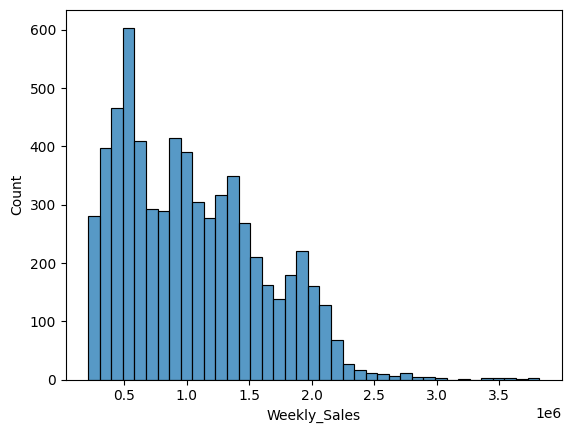

In [10]:
sns.histplot(data['Weekly_Sales'])

In [9]:
mean = data['Weekly_Sales'].mean()

std = data['Weekly_Sales'].std()

print("Mean Weekly Sales:", mean)
print("Standard Deviation of Weekly Sales:", std)

Mean Weekly Sales: 1046964.8775617715
Standard Deviation of Weekly Sales: 564366.6220536975


In [12]:
df1 = (1643690.90	- mean)/std
print(df1)

1.0573375517261756


In [23]:
upper_bound = mean + 3 * std
lower_bound = mean - 3 * std

z_scores = (data['Weekly_Sales'] - data['Weekly_Sales'].mean()) / data['Weekly_Sales'].std()

data_outliers_removed = data[abs(z_scores) <= 3] 

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

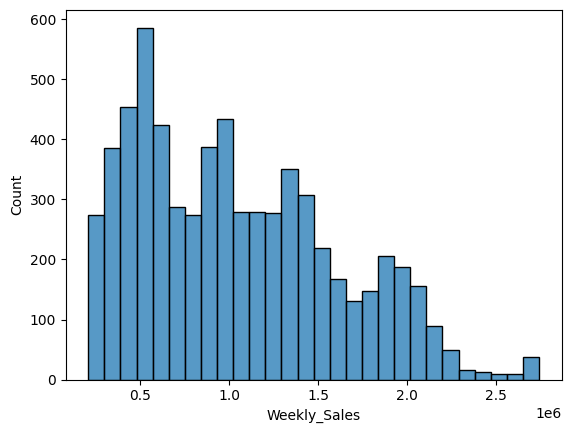

In [ ]:
sns.histplot(data['Weekly_Sales']) # Therefore Outliers are removed

#### Step - 5 : Checking Skewness and Kurtosis

In [28]:
print('skew of weekly sales',data['Weekly_Sales'].skew())
print('skew of Temperature',data['Temperature'].skew())

skew of weekly sales 0.5647530462590152
skew of Temperature -0.3367676011075799


In [30]:
print('kurtosis of weekly sales',data['Weekly_Sales'].kurt())
print('kurtosis of Temperature',data['Temperature'].kurt())

kurtosis of weekly sales -0.495728342264246
kurtosis of Temperature -0.6128009588453383


In [ ]:
# Applying power transformation to reduce skewness and kurtosis
from sklearn.preprocessing import PowerTransformer
trans = PowerTransformer(method='yeo-johnson')

la_trans = trans.fit_transform(data[['Weekly_Sales']])
la_trans.shape


(6435, 1)

In [41]:
print("Reduced skewness due to power transformation:",pd.Series(la_trans.reshape(-1)).skew())
print("Reduced Kurtosis due to power transformation:",pd.Series(la_trans.reshape(-1)).kurt())

Reduced skewness due to power transformation: -0.0561552796857259
Reduced Kurtosis due to power transformation: -0.9704701621906584


#### Step - 6 : Applying One Hot Encoding on categorical column

In [43]:
df1 = pd.get_dummies(data['Store'],prefix='Store',drop_first=True)
stat = pd.concat([data,df1],axis=1).drop(['Store'],axis=1)

stat.head()


,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Store_2,Store_3,Store_4,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,False,False,False,...,False,False,False,False,False,False,False,False,False,False
